In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import ast
from tqdm import tqdm

In [343]:
style.use('fivethirtyeight')

In [3]:
tqdm.pandas()

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\tqdm\std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
songs = pd.read_csv('./data/ten_g_500_modeling_12filt_uncomp.csv', sep='\t')

In [319]:
songs.drop(columns='Unnamed: 0', inplace=True)

In [5]:
songs['energy_calc'] = songs['energy_calc'].progress_apply(lambda x: np.array(ast.literal_eval(x)))
songs['rms_calc'] = songs['rms_calc'].progress_apply(lambda x: np.array(ast.literal_eval(x)))
songs['mfcc_calc'] = songs['mfcc_calc'].progress_apply(lambda x: np.array(ast.literal_eval(x)))
songs['mfcc_mean'] = songs['mfcc_mean'].progress_apply(lambda x: np.array(ast.literal_eval(x)))
songs['mfcc_min'] = songs['mfcc_min'].progress_apply(lambda x: np.array(ast.literal_eval(x)))
songs['mfcc_max'] = songs['mfcc_max'].progress_apply(lambda x: np.array(ast.literal_eval(x)))

100%|██████████| 4999/4999 [00:00<00:00, 16366.38it/s]


In [196]:
features

Index(['mean_energy', 'std_energy', 'min_energy', 'max_energy', 'max_rms',
       'std_rms', 'median_rms', 'min_rms', 'mfcc_mean_00', 'mfcc_mean_01',
       'mfcc_mean_02', 'mfcc_mean_03', 'mfcc_mean_04', 'mfcc_mean_05',
       'mfcc_mean_06', 'mfcc_mean_07', 'mfcc_mean_08', 'mfcc_mean_09',
       'mfcc_mean_10', 'mfcc_mean_11', 'mfcc_std_00', 'mfcc_std_01',
       'mfcc_std_02', 'mfcc_std_03', 'mfcc_std_04', 'mfcc_std_05',
       'mfcc_std_06', 'mfcc_std_07', 'mfcc_std_08', 'mfcc_std_09',
       'mfcc_std_10', 'mfcc_std_11', 'mfcc_max_00', 'mfcc_max_01',
       'mfcc_max_02', 'mfcc_max_03', 'mfcc_max_04', 'mfcc_max_05',
       'mfcc_max_06', 'mfcc_max_07', 'mfcc_max_08', 'mfcc_max_09',
       'mfcc_max_10', 'mfcc_max_11', 'mfcc_min_00', 'mfcc_min_01',
       'mfcc_min_02', 'mfcc_min_03', 'mfcc_min_04', 'mfcc_min_05',
       'mfcc_min_06', 'mfcc_min_07', 'mfcc_min_08', 'mfcc_min_09',
       'mfcc_min_10', 'mfcc_min_11'],
      dtype='object')

In [197]:
features = songs.columns[24:].drop(['mfcc_calc', 'mfcc_mean', 'mfcc_min', 'mfcc_std', 'mfcc_max'])

In [198]:
genres = list(songs['genre'].unique())

In [199]:
# songs_minus_classical = songs[songs['genre'].isin(genres)]

In [330]:
X = songs[features]
y = songs['genre']

In [201]:
def running_models(X, y, scaled=False, c=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)
    
    # MODELING WITH SCALED FEATURES #
    
    # Scale the features
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    # Creating a df to display results
    model_df = pd.DataFrame(columns=['train_score', 'test_score'])
    
    model_sc = SVC(C=c, kernel='rbf', degree=3)
    model_sc.fit(X_train_sc, y_train)
    train_score = model_sc.score(X_train_sc, y_train)
    test_score = model_sc.score(X_test_sc, y_test)
    
    row = {'model': type(model_sc).__name__,
           'train_score' : train_score,
          'test_score' : test_score,
           'C': c,
          'scaled': True}
    model_df = model_df.append(row, ignore_index=True)
    
    # MODELING WITH UNSCALED FEATURES #
    
    model = SVC(C=c, kernel='rbf', degree=3)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    row = {'model': type(model).__name__,
       'train_score' : train_score,
      'test_score' : test_score,
       'C': c,
      'scaled': False}
    model_df = model_df.append(row, ignore_index=True)
    return model_df

In [202]:
running_models(X, y, scaled=False)

,train_score,test_score,C,model,scaled
0,0.862097,0.6088,10.0,SVC,1.0
1,0.603894,0.5648,10.0,SVC,0.0


Interesting, it looks like **unscaled data leads to less overfitting**. With an accuracy of $\approx$ 56.5%, this `SVC` model is outperforming the model using Spotify's features by about 6%

In [331]:
# Create train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)

# Scale the features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [332]:
model = SVC(C=10)

model.fit(X_train, y_train)

SVC(C=10)

In [333]:
cross_val_score(model, X_train, y_train, n_jobs=12)

array([0.55866667, 0.55466667, 0.584     , 0.536     , 0.5540721 ])

In [334]:
model.score(X_train, y_train)

0.6038943718324886

In [335]:
model.score(X_test, y_test)

0.5648

In [336]:
y_preds = model.predict(X_test)

In [337]:
categories = list(set(y_preds))
numbers = list(range(len(categories)))

In [338]:
results = X_test.copy()

In [339]:
results.loc[:, 'genre'] = y_test.copy()

In [340]:
results.loc[:, 'preds'] = y_preds.copy()

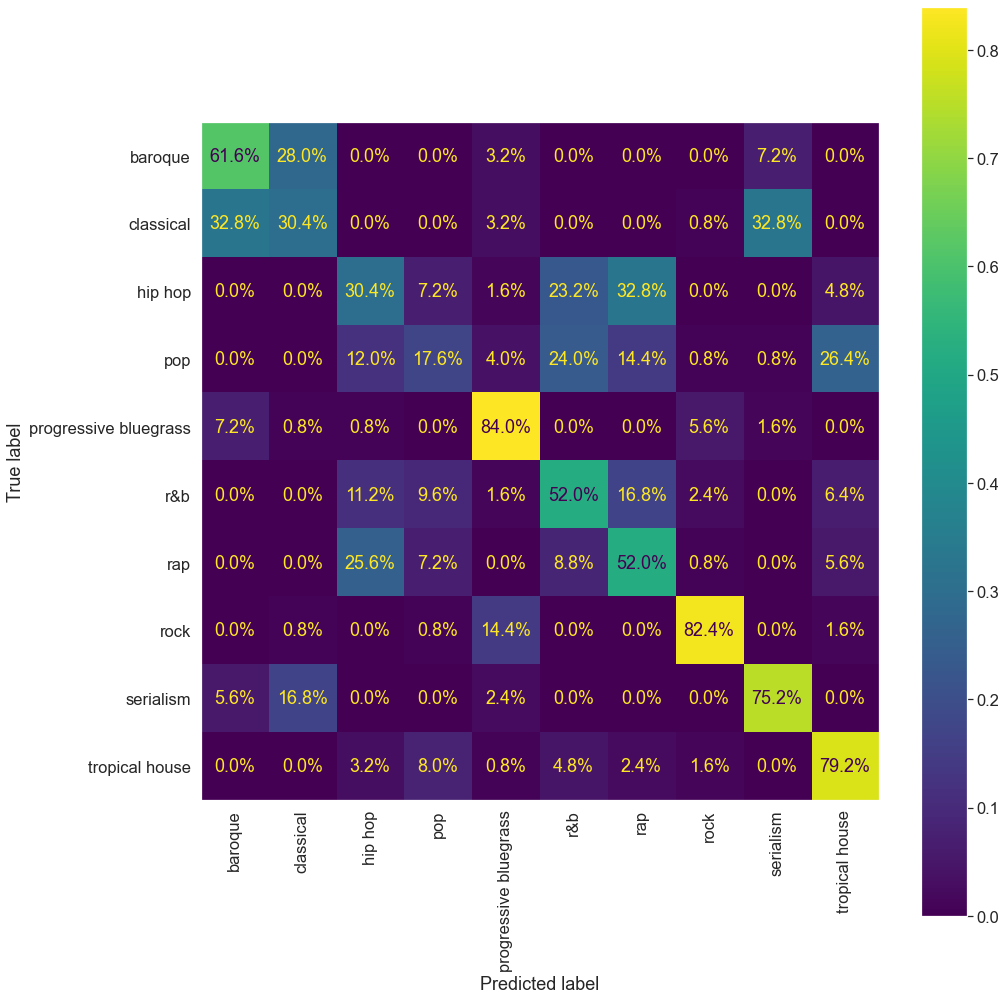

In [341]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.5)
plot_confusion_matrix(model, X_test, y_test, 
                      xticks_rotation='90', 
                      values_format='.1%', 
                      normalize='true', ax=ax)
plt.grid(False)
plt.tight_layout();

Interesting that **classical is now much less accurately predicted as classical** as compared to the 5-genre model using my features: now down to 30.4% from 95%.

Also, what this confusion matrix is good at showing us is **relationships between genres**. Note how hip hop, rap, r&b, and pop music seem to get confused for each other often. While 

In [297]:
results_wrong = results[results['genre'] != results['preds']]

In [298]:
songs_wrong = songs.loc[results_wrong.index, ['track_name']]

In [299]:
results_wrong['track_name'] = songs_wrong

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## What songs were predicted wrong?

Let's dig in to what our model is having trouble predicting - we'll get more into this in the final notebook, but is there anything we can glean, initially?

In [300]:
results_wrong[(results_wrong['preds'] == 'r&b') & (results_wrong['genre'] == 'rap')].head()

,mean_energy,std_energy,min_energy,max_energy,max_rms,std_rms,median_rms,min_rms,mfcc_mean_00,mfcc_mean_01,...,mfcc_min_05,mfcc_min_06,mfcc_min_07,mfcc_min_08,mfcc_min_09,mfcc_min_10,mfcc_min_11,genre,preds,track_name
3195,24.843471,43.473087,0.711391,312.387702,0.781110,0.116883,0.156280,0.037275,-141.366699,133.685287,...,-20.908154,-35.137718,-27.743557,-29.407875,-26.499763,-27.540306,-25.050533,rap,r&b,Let Me Love You
3321,26.590519,29.747921,0.191029,273.605072,0.731016,0.110927,0.180929,0.019316,-133.751358,115.526764,...,-15.578063,-50.545280,-39.140114,-38.253895,-32.995163,-34.234432,-34.955311,rap,r&b,Only You (feat. The Notorious B.I.G. & Mase) -...
3165,47.097539,23.124728,1.186404,163.884424,0.565762,0.077898,0.299036,0.048137,-74.971954,114.833939,...,-24.593081,-79.668434,-25.795635,-51.206230,-33.526154,-35.183311,-32.016739,rap,r&b,"Lean Back (feat. Lil Jon, Eminem, Mase & Remy ..."
3245,29.673278,31.338210,0.298578,281.688644,0.741737,0.099919,0.205723,0.024149,-104.038696,130.311005,...,-15.830107,-53.566849,-32.964211,-33.709805,-41.523914,-34.184483,-26.018078,rap,r&b,How Could You
3335,60.966544,56.715459,0.013328,335.565174,0.809568,0.142688,0.282822,0.005102,-79.955498,124.234909,...,-5.862773,-69.910767,-28.862019,-38.025276,-47.551888,-29.548595,-38.075996,rap,r&b,Panini - DaBaby Remix


In my conclusions, I want to listen to some of the songs that were misclassified and determine what might be causing the misclassifications. **Is there something that I can hear as a feature to separate the genres?**

In [302]:
group_preds = results_wrong.groupby('preds').mean()

<AxesSubplot:title={'center':'Percent Predicted Wrong'}>

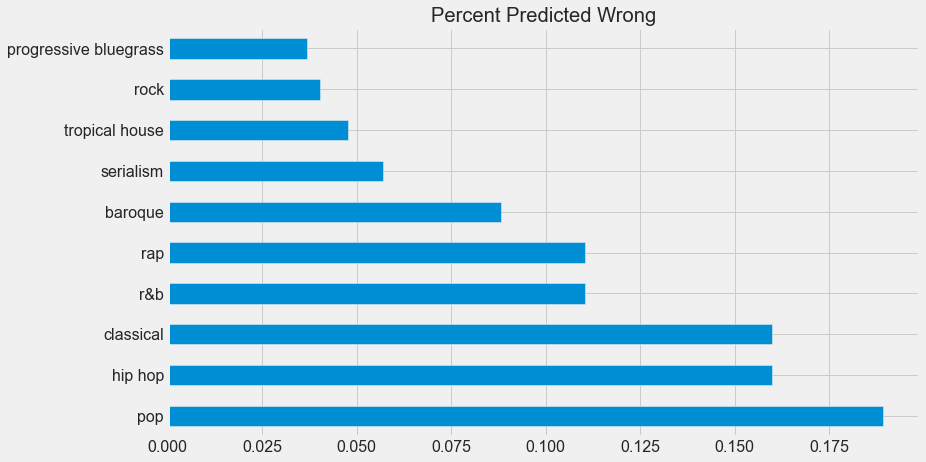

In [344]:
results_wrong['genre'].value_counts(normalize=True).plot(kind='barh', title='Percent Predicted Wrong', fontsize=16, figsize=(12,7))

Classical and pop are near the top of the list of "most incorrectly predicted". These genres are more generic genres with many subgenres underneath. It makes sense that the model wasn't able to predict well.

In [348]:
results_wrong['genre'].value_counts(normalize=True)

pop                      0.189338
hip hop                  0.159926
classical                0.159926
r&b                      0.110294
rap                      0.110294
baroque                  0.088235
serialism                0.056985
tropical house           0.047794
rock                     0.040441
progressive bluegrass    0.036765
Name: genre, dtype: float64

In [346]:
results_wrong[results_wrong['genre'] == 'rap']['preds'].value_counts(normalize=True)

hip hop           0.533333
r&b               0.183333
pop               0.150000
tropical house    0.116667
rock              0.016667
Name: preds, dtype: float64

Contrary to the last model, **when rap is predicted wrong, it is most likely to be predicted as hip hop**. This means our 10-genre model more closely relates rap with hip hop. As a refresher, when our 5-genre model predicted rap wrong, it predicted it as r&b 100% of the time.

In [316]:
results_wrong[results_wrong['genre'] == 'r&b']['preds'].value_counts(normalize=True)

rap                      0.350000
hip hop                  0.233333
pop                      0.200000
tropical house           0.133333
rock                     0.050000
progressive bluegrass    0.033333
Name: preds, dtype: float64

Contrary to the 5-genre model, **when R&B is predicted wrong, it's predicted to be rap only 35% of the time**, down from 84% of the time in the 5-genre model.

In [318]:
genre_mean = songs.groupby('genre').mean()
genre_mean

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,mfcc_min_02,mfcc_min_03,mfcc_min_04,mfcc_min_05,mfcc_min_06,mfcc_min_07,mfcc_min_08,mfcc_min_09,mfcc_min_10,mfcc_min_11
genre,,,,,,,,,,,,,,,,,,,,,
baroque,249.5,0.392776,0.178952,5.17000,-19.286864,0.588000,0.045943,0.882358,0.348177,0.155504,...,-75.971891,-22.550999,-41.328129,-30.099411,-42.864089,-33.821564,-33.110345,-32.652442,-33.419325,-31.438058
classical,749.0,0.340965,0.133792,5.44489,-21.918160,0.639279,0.051771,0.927493,0.419166,0.159003,...,-76.696989,-32.352754,-41.180309,-31.188402,-42.927496,-34.955436,-32.577203,-35.036528,-35.137971,-32.258754
hip hop,1248.5,0.731250,0.610512,5.39600,-6.852598,0.552000,0.174632,0.161367,0.008938,0.181947,...,-98.550016,-19.435611,-80.739902,-29.751877,-62.105309,-34.761623,-43.518967,-40.672408,-38.398482,-36.357959
pop,1748.5,0.650358,0.631876,5.27800,-6.650136,0.542000,0.099121,0.210477,0.009734,0.169190,...,-94.344199,-16.135661,-75.881946,-25.403887,-59.400475,-30.692582,-41.888531,-39.048395,-34.398374,-35.150718
progressive bluegrass,2248.5,0.522036,0.493759,5.43000,-10.392788,0.888000,0.037986,0.602202,0.257000,0.197003,...,-77.584334,-3.454413,-55.450037,-22.412720,-45.500141,-26.676779,-34.844463,-31.084369,-29.514466,-30.581459
r&b,2748.5,0.663824,0.573404,5.42200,-7.103356,0.472000,0.116913,0.231983,0.002525,0.170672,...,-91.641489,-12.109096,-76.476512,-22.847416,-62.280553,-29.303920,-42.134445,-40.933118,-35.010473,-34.956445
rap,3248.5,0.743980,0.599746,5.15200,-7.045948,0.516000,0.198736,0.153012,0.002407,0.173035,...,-102.045965,-24.429310,-84.422738,-30.773351,-61.048286,-35.852423,-43.126662,-41.254970,-38.848292,-36.994907
rock,3748.5,0.474469,0.711504,5.14000,-8.279630,0.752000,0.066935,0.168508,0.062943,0.190533,...,-99.444419,7.600111,-56.544910,-15.355177,-45.175749,-22.740514,-32.291102,-25.826905,-26.582750,-26.676978
serialism,4248.5,0.333918,0.084959,5.03000,-24.444934,0.636000,0.055611,0.953536,0.352695,0.185078,...,-88.585471,-43.169151,-47.170562,-38.795953,-46.036442,-37.501629,-34.693470,-41.200513,-37.620380,-34.527494


In [6]:
cnn_df = songs[['mfcc_calc', 'genre']].explode('mfcc_calc')

In [120]:
def cnn_sequential_prep(data, column, rename_suffix, n_windows, drop=True):
    '''
    Picks sequential rows from data on a given column.
    Dataframe passed should include a calculation column
    and a categorical column.
    '''
    grouped = data.groupby(data.index).apply(lambda x: x.iloc[:n_windows]) # Group data by index
    grouped_tag = grouped.droplevel(0)[column].progress_apply(pd.Series) # Turns each item in array into its own column
    grouped_tag = grouped_tag.rename(columns = lambda x: rename_suffix + str(x)) # Rename columns so I know what they are
    final = pd.concat([grouped_tag[:], grouped.droplevel(0)[:]], axis=1) # Concatenate with original dataframe
    if drop:
        final.drop(columns=column)
    
    return final

In [121]:
first_10_windows = cnn_sequential_prep(cnn_df, 'mfcc_calc', 'mfcc_', 10) # first 10 time windows generated sequentially

100%|██████████| 49990/49990 [00:06<00:00, 7470.28it/s] 


In [123]:
first_10_windows

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,genre
0,-260.384155,184.419159,-32.689117,8.517904,12.561333,-1.082070,12.131789,9.194002,2.832432,0.018565,0.959311,-9.422457,baroque
0,-242.452362,172.554031,-36.633961,18.364727,8.966149,5.528990,2.863243,5.775057,4.440852,-0.442283,6.851048,-3.847106,baroque
0,-240.757248,159.320709,-38.285454,25.459965,6.085552,4.605653,-9.199607,-0.562701,-0.579649,-7.270251,6.902614,-0.223527,baroque
0,-241.107224,160.725159,-31.500217,34.618347,8.758875,2.615864,-9.318913,0.401442,-4.248247,-5.401270,10.745039,0.958741,baroque
0,-239.302216,163.978378,-26.646151,32.934128,9.104835,1.732316,-15.030292,3.801802,-0.649859,2.420203,20.973858,4.197099,baroque
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,-144.634415,154.145416,-31.375298,69.032288,-10.431767,27.253874,21.941105,24.670368,22.471745,-7.226432,1.508565,-14.322573,tropical house
4998,-155.974884,152.568329,-24.223408,73.984558,-4.344028,25.294678,22.094257,22.101295,11.756784,-7.147667,2.309662,-15.297098,tropical house
4998,-165.527893,153.752975,-22.686428,78.097359,7.849333,20.310263,11.855047,20.966122,20.933315,-4.618083,-0.086283,-17.581715,tropical house
4998,-146.724350,151.618927,-19.515703,65.815552,13.192740,26.491226,5.733720,21.626116,6.503990,11.793239,-7.322265,-5.027958,tropical house


## Convolutional Neural Network

I've seen many people posting on the usefulness of CNNs for instrument and genre classification, and I wanted to try it out. Since Mel Frequency Cepstral Coefficients are used to generate spectrograms, they can be passed similarly to image data through a CNN.

In [283]:
# Some of my songs ended up being longer than 30 seconds, 
# so I had to reduce them all to the minimum number of windows (30 seconds)
cnn_df = songs['mfcc_calc'].apply(lambda x: x[:2584]) 

In [284]:
# Prepping the 2d mfcc_calcs to be passed through a CNN requires them
# to be separated into columns
for i in tqdm(range(len(cnn_df))):
    cnn_df[i] = np.array([coef for window in cnn_df[i] for coef in window])

100%|██████████| 4999/4999 [00:37<00:00, 134.12it/s]


In [285]:
# Let's split the lists into their own columns!
cnn_df = cnn_df.progress_apply(pd.Series)

100%|██████████| 4999/4999 [00:05<00:00, 935.06it/s]  


In [286]:
cnn_df = pd.concat([cnn_df[:], songs[['genre']]], axis=1) # Adding genre to this df

In [287]:
X = cnn_df.drop(columns='genre')
# Thanks joris on SO: https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/32011969
y_cat = cnn_df['genre'].astype('category').cat.codes

In [288]:
y = to_categorical(y_cat) # One Hot Encoding y

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)

In [290]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [291]:
# Scaling data for CNN
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Data needs to be reshaped to be the size of the mfcc spectrogram, which is 2584 x 12 x 1

In [323]:
X_train = X_train.reshape(X_train.shape[0], 2584, 12, 1)
X_test = X_test.reshape(X_test.shape[0], 2584, 12, 1)

In [321]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6,
                     kernel_size=(4, 4),
                     activation='relu',
                     input_shape=(X_train.shape[1], X_train.shape[2], 1)))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=12,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(X_train.shape[1], X_train.shape[2], 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

hist = cnn_model.fit(X_train, y_train,
                epochs=30,
                batch_size=256,
                validation_data=(X_test, y_test),
                    use_multiprocessing=True,
                    verbose=1)

Epoch 1/30
15/15 [==============================] - 3s 221ms/step - loss: 2.3184 - acc: 0.1094 - val_loss: 2.2513 - val_acc: 0.1816
Epoch 2/30
15/15 [==============================] - 3s 205ms/step - loss: 2.2303 - acc: 0.1440 - val_loss: 2.1527 - val_acc: 0.2352
Epoch 3/30
15/15 [==============================] - 3s 206ms/step - loss: 2.1575 - acc: 0.1750 - val_loss: 2.0717 - val_acc: 0.1960
Epoch 4/30
15/15 [==============================] - 3s 212ms/step - loss: 2.0955 - acc: 0.1905 - val_loss: 1.9910 - val_acc: 0.2312
Epoch 5/30
15/15 [==============================] - 3s 207ms/step - loss: 1.9996 - acc: 0.2139 - val_loss: 1.8945 - val_acc: 0.2560
Epoch 6/30
15/15 [==============================] - 3s 203ms/step - loss: 1.9173 - acc: 0.2499 - val_loss: 1.7639 - val_acc: 0.2984
Epoch 7/30
15/15 [==============================] - 3s 210ms/step - loss: 1.8073 - acc: 0.2734 - val_loss: 1.6527 - val_acc: 0.3440
Epoch 8/30
15/15 [==============================] - 3s 209ms/step - loss: 1.

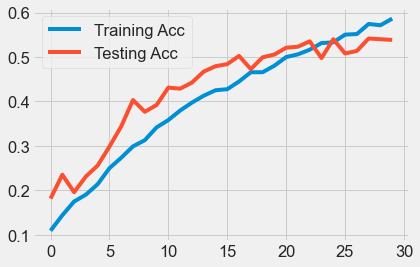

In [345]:
plt.plot(hist.history['acc'], label="Training Acc")
plt.plot(hist.history['val_acc'], label="Testing Acc")
plt.legend();

## What's next?

Conclusions! We've done some great modeling and are beating the baseline model (models using Spotify features) by 